### Name : Arghya Paul <br> PRN : 22070126018
### <p align = 'center'>Experiment 1 :  Discuss about recognizing objects in consumer images, analyzing human activity in video using tools / platforms.</p>
#### <P align = 'center'>Objectives :
1) Access the camera integrated with Desktop/Laptop using OpenCV in python.<br>
2) Capture the video and store the same.<br>
3) Perform different operations frame-wise on captured images/ video by using Haar-Cascade.<br>
4) Operations includes blurring, negative, enhancement etc.
</p>

##### The Normal Code (Unfiltered):

In [23]:
import cv2

# Open the default camera
cam = cv2.VideoCapture(0)

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('D:/output_orignal.mp4', fourcc, 20.0, (frame_width, frame_height))

while True:
    ret, frame = cam.read()

    # Write the frame to the output file
    out.write(frame)

    # Display the captured frame
    cv2.imshow('Camera', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) == ord('q'):
        break

# Release the capture and writer objects
cam.release()
out.release()
cv2.destroyAllWindows()

<p>Output</p>

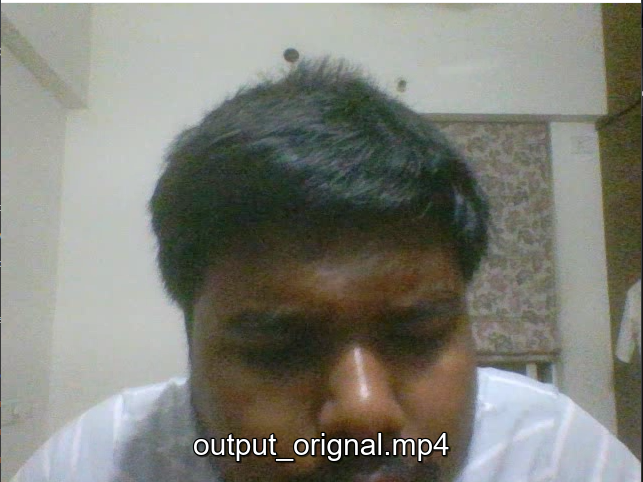

##### Applying Canny Filter

<p>The canny filter is generally used to detect the edges It works by:<br>

1.) Smoothing the image to reduce noise.<br>

2.) Finding gradients (intensity changes) in the image.<br>

3.) Applying non-maximum suppression to thin out edges. </p>

<p>In Real Life it can be used in :<br>Object Detection: Detecting edges helps in identifying objects in images, which is useful in applications like self-driving cars (e.g., detecting lane markings or obstacles).<br>
Medical Imaging: Edge detection is used to identify boundaries of organs or tumors in X-rays, MRIs, or CT scans.<br>
Facial Recognition: Edge detection helps in identifying facial features like eyes, nose, and mouth.</p>

In [13]:
import cv2

# Open the default camera
cam = cv2.VideoCapture(0)

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('D:/output_canney.mp4', fourcc, 20.0, (frame_width, frame_height))

while True:
    ret, frame = cam.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 100, 200)  # You can adjust the thresholds (100, 200) as needed

    # Write the frame with edges to the output file
    out.write(cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR))

    # Display the original and the edges frame
    # cv2.imshow('Camera', frame)
    cv2.imshow('Edges', edges)

    # Write the frame to the output file
    # Display the captured frame
    # cv2.imshow('Camera', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) == ord('q'):
        break

# Release the capture and writer objects
cam.release()
out.release()
cv2.destroyAllWindows()

<p>Output :</p>

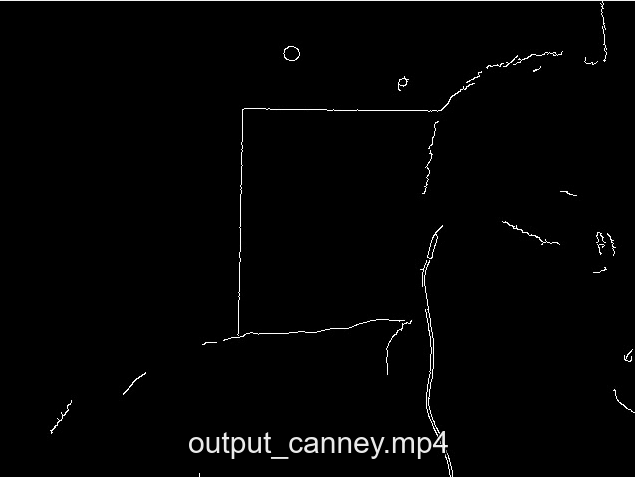

##### Applying the sobel filter

<p>The Sobel operator computes the gradient of the image intensity at each pixel. It highlights regions of high spatial frequency, which correspond to edges.
It uses two 3x3 kernels (one for horizontal changes and one for vertical changes) to approximate the gradient</p>

<p>In Real Life it is used in: <br>
Edge Detection: Similar to Canny, but Sobel is often used when computational efficiency is important.<br>
Feature Extraction: Used in applications like fingerprint recognition or document analysis to extract important features.<br>
Motion Detection: Detecting edges in video frames to identify moving objects.</p>

In [22]:
import cv2
import numpy as np

# Open the default camera
cam = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cam.isOpened():
    print("Error: Could not open camera.")
    exit()

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('D:/output_sobel.mp4', fourcc, 20.0, (frame_width, frame_height), isColor=True)

while True:
    ret, frame = cam.read()
    
    # Check if frame is read correctly
    if not ret:
        print("Error: Failed to capture image.")
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Sobel edge detection
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    sobel = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

    # Normalize the Sobel output to the range [0, 255] and convert to CV_8U
    sobel_normalized = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    # Convert the Sobel output to a 3-channel image
    sobel_bgr = cv2.cvtColor(sobel_normalized, cv2.COLOR_GRAY2BGR)

    # Write the frame to the output file
    out.write(sobel_bgr)

    # Display the Sobel edge detection result
    cv2.imshow('Sobel Edge Detection', sobel_bgr)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) == ord('q'):
        break

# Release the capture and writer objects
cam.release()
out.release()
cv2.destroyAllWindows()

<p>Output :</p>

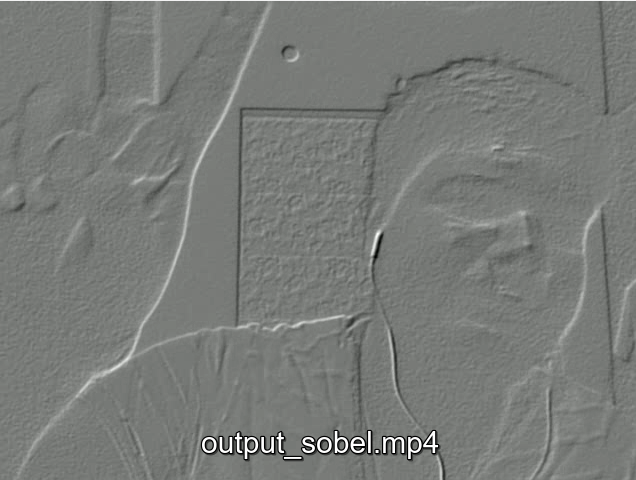

##### Erosion & Dilation Filter

<p>Erosion is a morphological operation that removes pixels from the boundaries of objects in a binary image. It shrinks the foreground objects and removes small noise or isolated pixels, while<br>
Dilation is the opposite of erosion. It adds pixels to the boundaries of objects in a binary image, expanding the foreground objects.</p>

<p>In Real Life the erosion filter can be used in :<br>
Noise Removal: Removing small noise or artifacts from binary images, such as in medical imaging or document scanning.<br>
Object Separation: Separating connected objects in an image by shrinking them.<br>
Industrial Inspection: Detecting defects in manufactured parts by removing unwanted noise.<br>
OCR (Optical Character Recognition): Cleaning up scanned documents to improve text recognition accuracy.</p>
<p>In Real Life the dilation filter can be used in :<br>
Filling Gaps: Connecting broken parts of objects, such as in handwritten text or road markings.<br>
Noise Reduction: Used in combination with erosion (e.g., in opening and closing operations) to remove noise while preserving object shapes.<br>
Object Detection: Enhancing the size of objects to make them easier to detect, such as in satellite imagery or medical imaging.<br>
Image Restoration: Recovering lost or degraded parts of an image.</p>

In [24]:
import cv2
import numpy as np

# Open the default camera
cam = cv2.VideoCapture(0)

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# Specify the full path including the file name and extension
out = cv2.VideoWriter("D:/output_erosion.mp4", fourcc, 20.0, (frame_width, frame_height))

while True:
    ret, frame = cam.read()

    if not ret:
        print("Failed to grab frame")
        break

    # Apply erosion and dilation
    kernel = np.ones((5, 5), np.uint8)
    erosion = cv2.erode(frame, kernel, iterations=3)
    dilation = cv2.dilate(frame, kernel, iterations=2)

    # Write the original frame to the output file
    out.write(dilation)

    # Display the original, erosion, and dilation frames
    # cv2.imshow('Camera', frame)
    cv2.imshow('Erosion', dilation)
    # cv2.imshow('Dilation', dilation)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) == ord('q'):
        break

# Release the capture and writer objects
cam.release()
out.release()
cv2.destroyAllWindows()

<p>Output :</p>

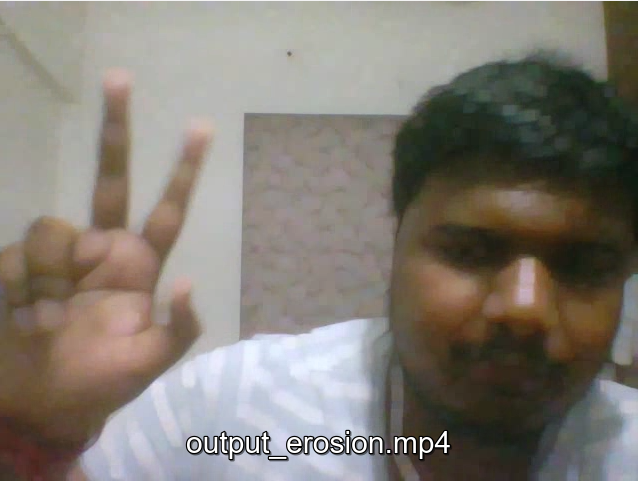

In [25]:
import cv2
import numpy as np

# Open the default camera
cam = cv2.VideoCapture(0)

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# Specify the full path including the file name and extension
out = cv2.VideoWriter("D:/output_dilation.mp4", fourcc, 20.0, (frame_width, frame_height))

while True:
    ret, frame = cam.read()

    if not ret:
        print("Failed to grab frame")
        break

    # Apply erosion and dilation
    kernel = np.ones((5, 5), np.uint8)
    erosion = cv2.erode(frame, kernel, iterations=3)
    dilation = cv2.dilate(frame, kernel, iterations=2)

    # Write the original frame to the output file
    out.write(erosion)

    # Display the original, erosion, and dilation frames
    # cv2.imshow('Camera', frame)
    cv2.imshow('Erosion', erosion)
    # cv2.imshow('Dilation', dilation)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) == ord('q'):
        break

# Release the capture and writer objects
cam.release()
out.release()
cv2.destroyAllWindows()

<p>Output :</p>

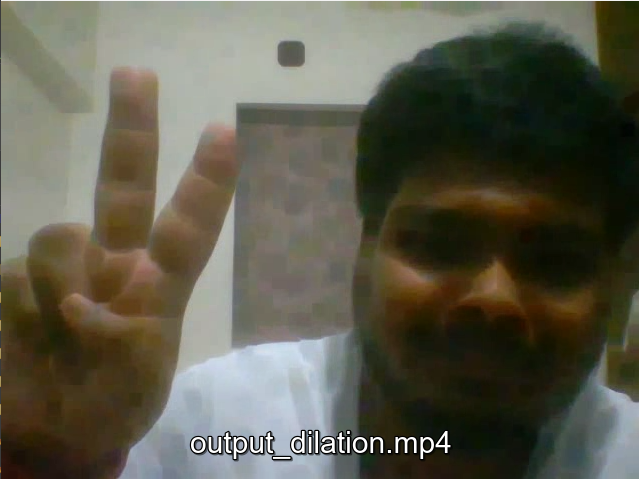